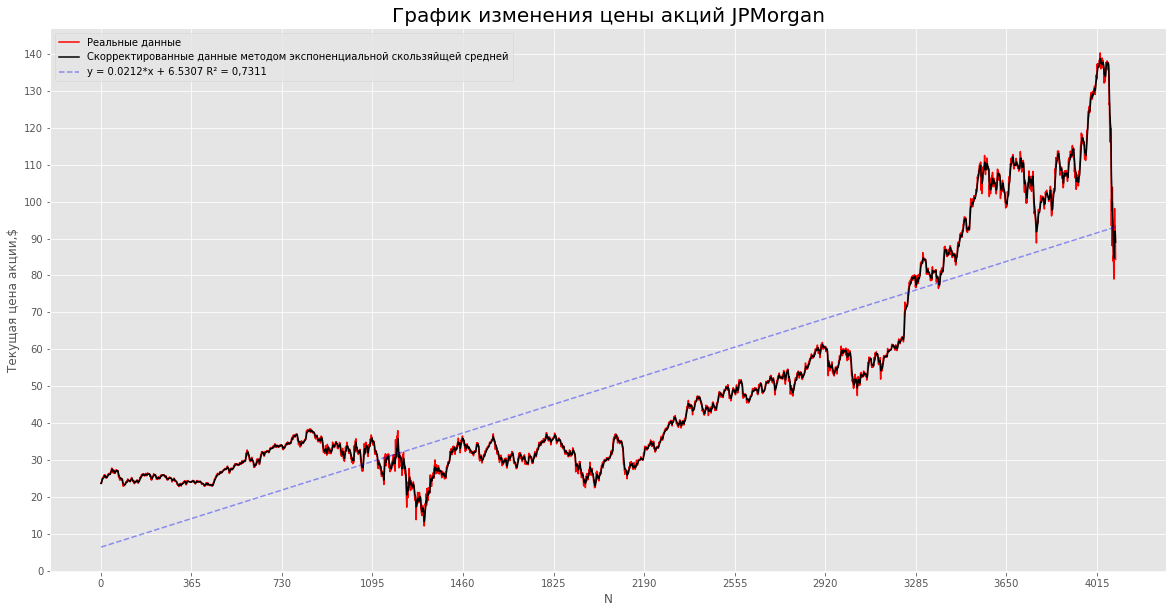

In [98]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import math 
import csv




df = pd.read_csv("JPMorgan33.csv", sep = ",")
B=df.Price[0:4090]

#EMA- экспоненциальная взвешенная скользящая средняя.
EMA=[]
a=B[0]
for i in range(1,4090,1):
    
    EMA.append(a)
    a=(1/3)*B[i]+(2/3)*a
    
EMA.append(a)
    
    
A=df.N[0:4090]



Q=df.N[0:4090]

fig  ,ax = plt.subplots(figsize=(20, 10))
ax.plot(Q,B, linestyle='-', color='Red', marker='', label='Реальные данные', )

ax.plot(A,EMA, linestyle='-', color='black', marker='', label='Cкорректированные данные методом экспоненциальной скользяйщей средней', )

x=Q
Y=y = coef_b*x + coef_a

ax.plot(x,Y, linestyle='--', color='blue', alpha=0.4, label='y = 0.0212*x + 6.5307 R² = 0,7311')

ax.set_title('График изменения цены акций JPMorgan',fontsize=20)


ax.set_xlabel("N")
ax.set_ylabel("Текущая цена акции,$")
ax.legend(loc='best')

ax.set_xticks(np.arange(0,4090,365))
ax.set_yticks(np.arange(0,145,10))



fig.savefig('./graf1.png')



In [147]:
#МНК для исходных данных
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([]).reshape((-1, 1))
y = np.array([])

df = pd.read_csv("JPMorgan33.csv", sep = ",")
B=df.N[0:4090]
A=df.Price[0:4090]

for i in range(0,4090,1):
    x=np.append(x,B[i]).reshape((-1, 1))

for i in range(0,4090,1):
    y=np.append(y,A[i])

model = LinearRegression()
model.fit(x, y)



coef_deter = model.score(x, y)
print(coef_deter)

coef_a=model.intercept_
coef_b=model.coef_[0]
print( coef_a)
print( coef_b)



0.7310519607003769
6.530712700723356
0.0211697615706866


In [148]:
#Cтроим аддитивную модель


SMark=[]
for i in range (0,4090,1):
    SMark.append(A[i]-EMA[i])

        


sum1=SMark[0]
sum2=SMark[1]
sum3=SMark[2]
sum4=SMark[3]
sum5=SMark[4]
for i in range(5,4090,1):
    if((i-5)%5==0):
        sum1+=SMark[i]
    if((i-5)%5==1):
        sum2+=SMark[i]
    if((i-5)%5==2):
        sum3+=SMark[i]
    if((i-5)%5==3):
        sum4+=SMark[i]
    if((i-5)%5==4):
        sum5+=SMark[i]

avgsum1=sum1/818
avgsum2=sum2/818
avgsum3=sum3/818
avgsum4=sum4/818
avgsum5=sum5/818

coravgsum1=avgsum1-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum2=avgsum2-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum3=avgsum3-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum4=avgsum4-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum5=avgsum5-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)

zero=coravgsum1+coravgsum2+coravgsum3+coravgsum4+coravgsum5
#print(zero)

#SMark- оценка сезонной компоненты
#sum(i)-сумма оценок сезонных компонент для каждого дня недели
#avgsum(i)-средняя от sum(i)
#coravgsum(i)-скорректированная среднняя sum(i)

#YS=Т+Е в аддитивной модели
YS=[]

for i in range(0,4090,1):
    if((i-5)%5==0):
        YS.append(A[i]-coravgsum1)
    if((i-5)%5==1):
        YS.append(A[i]-coravgsum2)
    if((i-5)%5==2):
        YS.append(A[i]-coravgsum3)
    if((i-5)%5==3):
        YS.append(A[i]-coravgsum4)
    if((i-5)%5==4):
        YS.append(A[i]-coravgsum5)
#print(YS)
        

    


#Считаем значения Т-трендовой составляющей

T=[]
for i in range(1,4091,1):
    T.append(coef_a+coef_b*i)
#print(T)

#Находим случайную составляющую E

E=[]

for i in range(0,4090,1):
    E.append(YS[i]-T[i])
#print(E)
#Находим прогнозные значения по аддитивной модели ряда
TS=[]
for i in range(0,4090,1):
    if((i-5)%5==0):
        TS.append(T[i]+coravgsum1)
    if((i-5)%5==1):
        TS.append(T[i]+coravgsum2)
    if((i-5)%5==2):
        TS.append(T[i]+coravgsum3)
    if((i-5)%5==3):
        TS.append(T[i]+coravgsum4)
    if((i-5)%5==4):
        TS.append(T[i]+coravgsum5)
print(coravgsum1)







-0.014467217514227193


In [179]:
#Строим мультипликативную модель 


#SMark_Multi- оценка сезонной компоненты мультипликативной модели
SMark_Multi=[]
for i in range (0,4090,1):
    SMark_Multi.append(A[i]/EMA[i])

        

#Multi_sum(i)-сумма оценок сезонных компонент для каждого дня недели
Multi_sum1=SMark_Multi[0]
Multi_sum2=SMark_Multi[1]
Multi_sum3=SMark_Multi[2]
Multi_sum4=SMark_Multi[3]
Multi_sum5=SMark_Multi[4]
for i in range(5,4090,1):
    if((i-5)%5==0):
        Multi_sum1+=SMark_Multi[i]
    if((i-5)%5==1):
        Multi_sum2+=SMark_Multi[i]
    if((i-5)%5==2):
        Multi_sum3+=SMark_Multi[i]
    if((i-5)%5==3):
        Multi_sum4+=SMark_Multi[i]
    if((i-5)%5==4):
        Multi_sum5+=SMark_Multi[i]

#AMSum(i)-средняя от Multi_sum(i)
AMSum1=Multi_sum1/818
AMSum2=Multi_sum2/818
AMSum3=Multi_sum3/818
AMSum4=Multi_sum4/818
AMSum5=Multi_sum5/818

#Найдем корректирующий коэффициент 
kor_coef=5/(AMsum1+AMsum2+AMsum3+AMsum4+AMsum5)

#CAMSum(i)-скорректированная среднняя sum(i)
CAMSum1=AMSum1*kor_coef
CAMSum2=AMSum2*kor_coef
CAMSum3=AMSum3*kor_coef
CAMSum4=AMSum4*kor_coef
CAMSum5=AMSum5*kor_coef

#сделаем проверку суммы CAMSum(i)
five=CAMSum1+CAMSum2+CAMSum3+CAMSum4+CAMSum5
#print(five)

#YS_Multi=Т*Е в мультипликативной модели модели

YS_Multi=[]

for i in range(0,4090,1):
    if((i-5)%5==0):
        YS_Multi.append(A[i]/CAMSum1)
    if((i-5)%5==1):
        YS_Multi.append(A[i]/CAMSum2)
    if((i-5)%5==2):
        YS_Multi.append(A[i]/CAMSum3)
    if((i-5)%5==3):
        YS_Multi.append(A[i]/CAMSum4)
    if((i-5)%5==4):
        YS_Multi.append(A[i]/CAMSum5)
        

#Находим случайную составляющую E

E_Multi=[]

for i in range(0,4090,1):
    E_Multi.append(YS_Multi[i]/T[i])
#print(E_Multi)       


#Находим прогнозные значения по   мультипликативной модели ряда
TS_Multi=[]
for i in range(0,4090,1):
    if((i-5)%5==0):
        TS_Multi.append(T[i]+CAMSum1)
    if((i-5)%5==1):
        TS_Multi.append(T[i]+CAMSum2)
    if((i-5)%5==2):
        TS_Multi.append(T[i]+CAMSum3)
    if((i-5)%5==3):
        TS_Multi.append(T[i]+CAMSum4)
    if((i-5)%5==4):
        TS_Multi.append(T[i]+CAMSum5)
#print(TS_Multi)




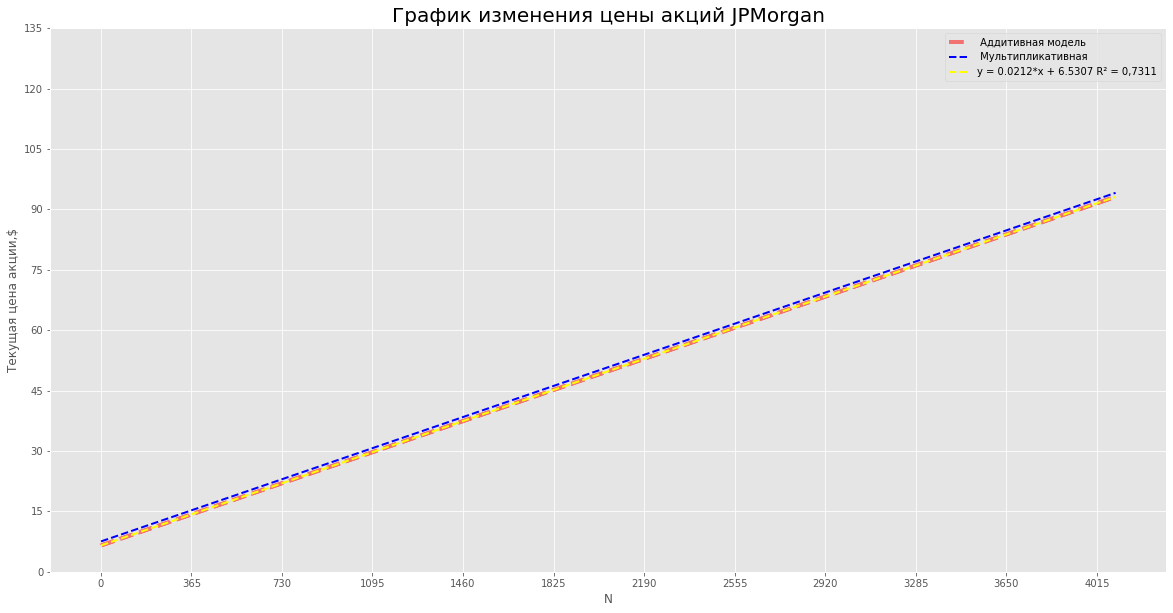

In [165]:
fig  ,ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(Q,TS, linestyle='--', color='Red', marker='',alpha=0.5, linewidth='4',label=' Аддитивная модель', )

ax1.plot(Q,TS_Multi, linestyle='--', color='blue', marker='',linewidth='2',label=' Мультипликативная  ', )


x=Q
Y=y = coef_b*x + coef_a

ax1.plot(x,Y, linestyle='--', color='yellow',linewidth='2', alpha=1, label='y = 0.0212*x + 6.5307 R² = 0,7311')





ax1.set_title('График изменения цены акций JPMorgan',fontsize=20)


ax1.set_xlabel("N")
ax1.set_ylabel("Текущая цена акции,$")
ax1.legend(loc='best')

ax1.set_xticks(np.arange(0,4090,365))
ax1.set_yticks(np.arange(0,145,15))



fig.savefig('./graf1.png')
